# Исследование данных. Продолжение

В предыдущий раз мы с вами осматривали датасет и делали кое-какие предположения о нем. Сегодня мы пойдем дальше и попробуем сделать небольшое тестовое приложение, которое будет считать ожидаемую зарплату нового сотрудника на основе имеющихся данных. 

# Часть 1. Файловая

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# В интерпретаторе Python мы можем перемещаться по директориям нашей операционной системы, 
# подобно тому как мы ходим по папочкам в "проводнике" виндоус или файндере MacOS

# Но происходит это не так тривиально -- вместо кнопок будем использовать пару команд из стандартной библиотеки os
# Для начала -- загрузим ее к себе в исполняемую среду. 
import os

In [3]:
# командой getcwd() мы можем вывести на экран текущую директорию, чтобы понять где мы
# cwd = current working directory

os.getcwd()

'C:\\Users\\zheny\\Documents\\hse_hr_data-master\\3'

In [55]:
# Попробуем выйти из нашей текущей папки "3" на уровень выше. 
# Для этого возьмем имя папки (dirname) из нашей текущей позиции (getcwd())

# Закомментировал строки ниже, так как на занятии с ними возникла проблема. 
# Если у вас датасет HRDataset_v14 находится в СОСЕДНЕЙ папке "2", то раскомментируйте строки ниже, должно сработать. 
# Если нет -- просто двигайтесь дальше по ноутбуку.

# path_parent = os.path.dirname(os.getcwd())
# os.chdir(path_parent)

In [5]:
# Убедимся, что интерпретатор вышел на уровень выше, снова выведем cwd на экран
os.getcwd()

'C:\\Users\\zheny\\Documents\\hse_hr_data-master\\3'

In [7]:
# Отсюда мы можем забрать наш уже привычный файл HRDataset_v14, обратившись к нему. 
# Мы ведь знаем что он внутри соседней директории "2":

df_hr = pd.read_csv('../2/HRDataset_v14.csv')

### Windows tricks: 

```
Если у вас возникла проблема с выполнением предыдущей ячейки на Windows, попробуйте в заменить в ней указатель директории с "/" на "\\"

Виндоуз использует обратный слеш для обозначения пути к файлу. 

Если после этого проблема не решилась -- копирните себе файлик HRDataset_v14 в директорию "3" и вызовите его таким же способом, как на прошлом занятии
```

In [8]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [9]:
pd.options.display.max_columns = 999

In [10]:
df_hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,4.070,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.000,Google Search,PIP,3.200,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.000,Employee Referral,Exceeds,4.600,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.000,Employee Referral,Fully Meets,5.000,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.000,LinkedIn,Fully Meets,4.500,5,0,1/30/2019,0,2


In [11]:
df_hr['State'].nunique()

28

Разобьем нашу выборку на пространство признаков (X) и ответов (y)

In [12]:
X = df_hr[['MarriedID', 'MaritalStatusID', 'DeptID', 'PerfScoreID', 
           'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount']]

y = df_hr[['Salary']]

In [13]:
# В объекте X у нас оказываются признаки

X

,MarriedID,MaritalStatusID,DeptID,PerfScoreID,PositionID,EmpSatisfaction,SpecialProjectsCount
0,0,0,5,4,19,5,0
1,1,1,3,3,27,3,6
2,1,1,5,3,20,3,0
3,1,1,5,3,19,5,0
4,0,2,5,3,19,4,0
...,...,...,...,...,...,...,...
306,0,0,5,3,20,4,0
307,0,0,5,1,19,2,0
308,0,0,3,4,6,5,6
309,0,0,3,3,9,3,5


In [14]:
# в объекте 'y' у нас оказываются ответы для этих признаков

y

,Salary
0,62506
1,104437
2,64955
3,64991
4,50825
...,...
306,65893
307,48513
308,220450
309,89292


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Посмотрим каков у нас оказался размер объектов в трейне и тесте
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(248, 7)
(63, 7)
(248, 1)
(63, 1)


In [17]:
Y_test

,Salary
290,88976
9,50178
57,83552
60,65729
25,103613
...,...
195,74417
210,68829
224,46799
158,66074


# Часть 2. Моделируем

In [18]:
lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression()

В этот момент за кадром обучилась небольшая модель линейной регрессии. 

Эта модель использовала зарплаты группы train (Y_train) как ответы и решила внутри себя систему линейных уравнений, назначив нашим признакам (X_train) некоторые веса. 

In [19]:
# посмотрим, какие из наших признаков оказались наиболее значимыми для определения зарплаты на объектах
importance = lin_model.coef_

print(importance)

[[ 1517.74204556 -1347.40107733 -2866.59535406  2891.55636358
   -182.22564328   698.45118922  3542.27308623]]


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# Определим функцию оценки ошибки получившейся модели:

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

## Оценка 

Попробуем оценить, насколько наша модель хороша. 

По канону оценку следует на двух выборках: на той, на которой модель тренировалась (X_train, Y_train) и на той, которую модель не видела совсем (X_test, Y_test)

In [22]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21191.638523978876
R2 score is 0.22959801927272339
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22109.81745997241
R2 score is 0.39606068622003676


In [23]:
X_test

,MarriedID,MaritalStatusID,DeptID,PerfScoreID,PositionID,EmpSatisfaction,SpecialProjectsCount
290,0,2,5,3,17,3,0
9,0,2,3,3,14,5,6
57,1,1,3,3,9,3,6
60,0,0,6,3,21,4,0
25,0,0,3,3,30,5,7
...,...,...,...,...,...,...,...
195,0,3,5,3,20,5,0
210,0,0,6,3,3,5,0
224,0,2,5,3,19,4,0
158,0,2,5,3,20,3,0


In [24]:
"""
Допустим, к нам на работу выходит человек со следующими параметрами: 

MarriedID = 0 
MaritalStatusID = 1
DeptID = 2
PerfScoreID = 3
PositionID = 9
EmpSatisfaction = 3
SpecialProjectsCount = 0


Каков ожидаемый уровень его зарплаты в нашем дружном коллективе?

Выясним это, используя метод .predict() только что обученной модели lin_model. 
Передадим в него параметры нашего новичка. 

"""

lin_model.predict([[0,1,2,3,9,3,0]])

array([[71503.70706851]])

In [24]:
# То есть у человека с такими параметрами в нашем коллективе справедливая зарплата должны быть где-то на уровне 71500. 

# Часть 3. Как можно улучшить реализацию?

## Подзаголовок

Понятно, что такая модель пока что наивна и далека от идеальной. У нее есть ряд минусов, главные из которых вот такие: 

* Модель учитывает не все потенциально полезные признаки
* Модель такого плана может читать только целочисленные признаки, все остальные в нее не передать.
* Признаки не нормализованны и с точки зрения модели они "весят" по-разному. 
* R2-score (доля объясняемой нашими фичами информации в ответах) весьма низкий. В идеале хотелось бы, чтобы он перемахнул за 0,5

Попробуем поэкспериментировать и если не улучшить результаты, то хотя бы лучше понять в какую сторону имеет смысл развивать модель

In [25]:
"""

У нас есть еще ряд признаков, которые интуитивно кажутся сильно связаны с зарплатой: география сотрудников
Есть как минимум Zip (почтовый индекс) и State (штат) сотрудника. 

Zip целочисленный. Можем просто добавить его в модель.

"""
X = df_hr[['MarriedID', 'MaritalStatusID', 'DeptID', 'PerfScoreID', 
           'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount', 'Zip']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
importance = lin_model.coef_
print(importance)

[[ 1.65359000e+03 -1.38771388e+03 -3.21744803e+03  2.93882137e+03
  -1.06352820e+02  8.01552657e+02  3.47567478e+03  5.79854070e-02]]


In [27]:
# Посмотрим что собой представляет, например, первый предсказанный моделью объект
y_test_predict = lin_model.predict(X_test)
y_test_predict[0]

array([59638.16329937])

In [28]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21180.617448845645
R2 score is 0.23039913243314092
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22150.65746021618
R2 score is 0.3938275007537455


In [29]:
# В целом, значения ошибки никак не изменились. Как вы думаете, почему? 


Перевести экспоненциальную запись числа в обычную: 

https://allcalc.ru/node/1103


# Часть 4. Не все фичи весят одинаково

Модель может заблуждаться относительно масштаба фичей, потому что использует числа из них "как есть" в уравнениях регрессии. Чтобы получать адекватные значения коэффициентов весов модели надо их уравнять на некой общей шкале.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [32]:
X = df_hr[['MarriedID', 'MaritalStatusID', 'DeptID', 'PerfScoreID', 
           'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount', 'Zip']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[  1653.59000082  -5550.85550861 -16087.24016112   8816.46412093
   -3084.23176896   3206.21062603  27805.39820063   5626.84591458]]


In [33]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21180.617448845645
R2 score is 0.23039913243314092
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22150.657460216127
R2 score is 0.3938275007537485


## А что было бы, если бы мы не скалировали признаки?

```

```

# Часть 5. Отсечь все лишнее

Иногда бывает полезно наоборот -- отсечь все лишнее. 
Выкинем из модели все признаки, по которым был низкий importance. 

Выбрасываем 'PositionID', 'EmpSatisfaction' и еще ряд бесполезных для нашей задачи признаков


In [34]:
X = df_hr[['MaritalStatusID', 'DeptID', 'PerfScoreID', 'SpecialProjectsCount', 'Zip']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -4871.98589343 -16094.21081832   9667.77613845  28680.33441284
    6974.11377811]]


In [35]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21212.984182557466
R2 score is 0.22804523516318365
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22106.636387933584
R2 score is 0.39623445846055794


In [36]:
# Тоже без изменений, но и ухудшений не видно, хотя мы выбросили из модели несколько признаков. 
# Обслуживать такую модель будет попроще, она создает меньше нагрузки, в том числе административной.

# Часть 6. Label Encoding - когда ваши фичи текстовые

У нас есть фича State - штат, в котором работает сотрудник. Эта сущность гораздо крупнее, чем индекс места жительства (zip). 
Интуитивно кажется, что это может влиять на зарплату. Но в модель это сейчас не передать - при попытке обработать текстовый признак в линейной регрессии она выпадет с ошибкой. 

Нам пригодится LabelEncoder() -- штука, которая назначает цифры вместо текстовых признаков



In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# creat1ing initial dataframe
temp_df = pd.DataFrame(df_hr[['State']])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_hr['State_id'] = labelencoder.fit_transform(temp_df['State'])

df_hr.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,State_id
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1,10
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17,10
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3,10
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15,10
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2,10
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.000,LinkedIn,Exceeds,5.000,5,0,1/7/2019,0,15,10
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.000,LinkedIn,Fully Meets,3.040,3,4,1/2/2019,0,19,10
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.000,Employee Referral,Fully Meets,5.000,4,0,2/25/2019,0,19,10
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.000,Diversity Job Fair,Fully Meets,4.460,3,0,1/25/2019,0,4,10
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.000,Indeed,Fully Meets,5.000,5,6,2/18/2019,0,16,10


In [39]:
# Попробуем еще раз запустить модель, но добавим признак State_id

X = df_hr[['MaritalStatusID', 'DeptID', 'PerfScoreID', 'SpecialProjectsCount', 'State_id']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -6083.46971713 -18526.89484848   9488.89077324  28121.72621546
   35602.76331095]]


In [40]:
# У него довольно высокий importance после скалирования -- это хороший знак

In [41]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20917.527709080798
R2 score is 0.24939920189023346
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22423.457175588028
R2 score is 0.3788047443334699


In [42]:
# В целом лучше не стало, скорее наоборот, R2 даже немного просел от таких фич. 
# Интересно, почему так?

In [43]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount of employees')

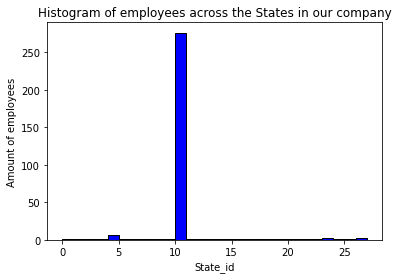

In [44]:
# matplotlib histogram
plt.hist(df_hr['State_id'], color = 'blue', edgecolor = 'black',
         bins = int(27))

# Add labels
plt.title('Histogram of employees across the States in our company')
plt.xlabel('State_id')
plt.ylabel('Amount of employees')

In [45]:
# State содержит в основной своей массе всего одно значение -- подавляющее большинство наших сотрудников работает всего в одном штате. 
# Получается, что с точки зрения модели для резидентов этого штата этот признак ничего не значит, а для всех остальных он просто недостаточен для каких-то выводов. 

## Что это было? 

То, что мы с вами сейчас сделали - одна из классических проблем машинного обучения: применение линейных регрессий для предсказания числового значения.
Самый классический пример тут: Boston Housing Prices -- задача предсказания цены дома на основании признаков (район, этажность и так далее).

Почитайте больше об этой проблеме: 
* https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

Расчет feature importance: 
* https://machinelearningmastery.com/calculate-feature-importance-with-python/


### Про ошибки: 

* Весьма хорошая статья про коэффициент детерминации на Вики: https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8
* И достаточно понятное видео: https://youtu.be/2AQKmw14mHM


* RMSE -- это просто квадратный корень от MSE (mean_squared_error): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* И тоже есть достойное видео по теме: https://youtu.be/Mhw_-xHVmaE



# Домашка

1. Прочитайте все статьи, упомянутые выше. 

2. В датасете остались еще фичи, которые позволяют улучшить результат: повысить R2 (чем ближе к 1, тем лучше) и понизить RMSE (чем меньше, тем лучше). Добавьте их в модель таким образом, чтобы RMSE на тестовой выборке оказался ниже уровня 22000, а R2 оказался выше 0.43. Какие фичи оказались самыми значимыми? Укажите их в файле. Как вы думаете, почему? Получившийся файл с описанными фичами и реализацией в коде опубликуйте у себя в GitHub. Файл должен полностью воспроизводиться при скачивании, ячейки должны в явном виде выводить RMSE и R2.

3. Сделайте другие задачи из файлика HomeTask_3.md (файлик рядом)


In [106]:
df_hr = pd.read_csv('../2/HRDataset_v14.csv')

In [107]:
df_hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2


In [108]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [109]:
del df_hr['Employee_Name']
del df_hr['ManagerName']
del df_hr['DateofTermination']

In [110]:
print(df_hr.shape)

(311, 33)


In [111]:
df_hr = df_hr.dropna()

In [112]:
print(df_hr.shape)

(303, 33)


In [113]:
y = df_hr['Salary']
del df_hr['Salary']

In [114]:
check_names = ['Position', 'State', 'MaritalDesc', 'Sex', 'CitizenDesc', 'HispanicLatino', 'RaceDesc','TermReason','EmploymentStatus',
              'Department','RecruitmentSource', 'PerformanceScore']
for name in check_names:
    labelencoder = LabelEncoder()

    # Assigning numerical values and storing in another column
    df_hr[name] = labelencoder.fit_transform(df_hr[name])

In [115]:
df_hr.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,0,0,1,1,5,4,0,0,19,22,10,1960,07/10/83,1,3,2,0,5,7/5/2011,3,0,3,22.000,5,0,4.600,5,0,1/17/2019,0,1
1,10084,1,1,1,5,3,3,0,1,27,30,10,2148,05/05/75,1,1,2,0,5,3/30/2015,5,2,2,4.000,4,1,4.960,3,6,2/24/2016,0,17
2,10196,1,1,0,5,5,3,0,1,20,23,10,1810,09/19/88,0,1,2,0,5,7/5/2011,7,2,3,20.000,5,1,3.020,3,0,5/15/2012,0,3
3,10088,1,1,0,1,5,3,0,0,19,22,10,1886,09/27/88,0,1,2,0,5,1/7/2008,3,0,3,16.000,4,1,4.840,5,0,1/3/2019,0,15
4,10069,0,2,0,5,5,3,0,1,19,22,10,2169,09/08/89,0,0,2,0,5,7/11/2011,16,2,3,39.000,3,1,5.000,4,0,2/1/2016,0,2


In [116]:
check_names = ['DOB', 'DateofHire', 'LastPerformanceReview_Date']
for name in check_names:
    df_hr[name] = pd.to_datetime(df_hr[name]).values.astype(int)/ 10**9

In [117]:
df_hr.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,0,0,1,1,5,4,0,0,19,22,10,1960,-0.573,1,3,2,0,5,-0.029,3,0,3,22.000,5,0,4.600,5,0,-1.597,0,1
1,10084,1,1,1,5,3,3,0,1,27,30,10,2148,-0.675,1,1,2,0,5,0.926,5,2,2,4.000,4,1,4.960,3,6,0.408,0,17
2,10196,1,1,0,5,5,3,0,1,20,23,10,1810,0.831,0,1,2,0,5,-0.029,7,2,3,20.000,5,1,3.020,3,0,-0.898,0,3
3,10088,1,1,0,1,5,3,0,0,19,22,10,1886,-1.141,0,1,2,0,5,1.239,3,0,3,16.000,4,1,4.840,5,0,-1.367,0,15
4,10069,0,2,0,5,5,3,0,1,19,22,10,2169,0.550,0,0,2,0,5,1.714,16,2,3,39.000,3,1,5.000,4,0,0.172,0,2


In [126]:
del df_hr['MarriedID']

In [127]:
X = df_hr.values

In [128]:
X_scaled = scaling(X)

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_

In [130]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 17888.204121186503
R2 score is 0.3640793232790951
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 31805.540229633538
R2 score is 0.10666366741801259
